# Autism Spectrum Disorder Prediction

---



Dataset Link: https://www.kaggle.com/competitions/autism-prediction/data

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 8]
pd.set_option('display.max_columns', None)

In [2]:
# Loading the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,1,14.679893,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,1,1,1,1,1,1,1,1,1,1,42.084907,f,White-European,no,yes,United States,no,13.390868,18 and more,Self,1
796,797,1,1,0,0,1,0,0,0,1,1,17.669291,f,Asian,no,no,New Zealand,no,9.454201,18 and more,Self,0
797,798,0,0,0,0,0,0,1,0,1,1,18.242557,m,White-European,yes,no,Jordan,no,6.805509,18 and more,Self,1
798,799,1,1,1,1,1,1,0,1,1,1,19.241473,f,Middle Eastern,no,yes,United States,no,3.682732,18 and more,Relative,0


Description of the columns:

* ID - ID of the patient
* A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
* age - Age of the patient in years
* gender - Gender of the patient
* ethnicity - Ethnicity of the patient
* jaundice - Whether the patient had jaundice at the time of birth
* autism - Whether an immediate family member has been diagnosed with autism
* country_of_res - Country of residence of the patient
* used_app_before - Whether the patient has undergone a screening test before
* result - Score for AQ1-10 screening test
* age_desc - Age of the patient
* relation - Relation of patient who completed the test
* Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column.

In [3]:
# Shape of the data
display(train.shape)
display(test.shape)

(800, 22)

(200, 21)

In [4]:
# Checking for null values
display(train.isna().sum().sum())
display(test.isna().sum().sum())

0

0

In [5]:
# Fixing the spelling issue
train = train.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'}, errors="raise")
test = test.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'}, errors="raise")

In [6]:
# Dropping duplicate values if any
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

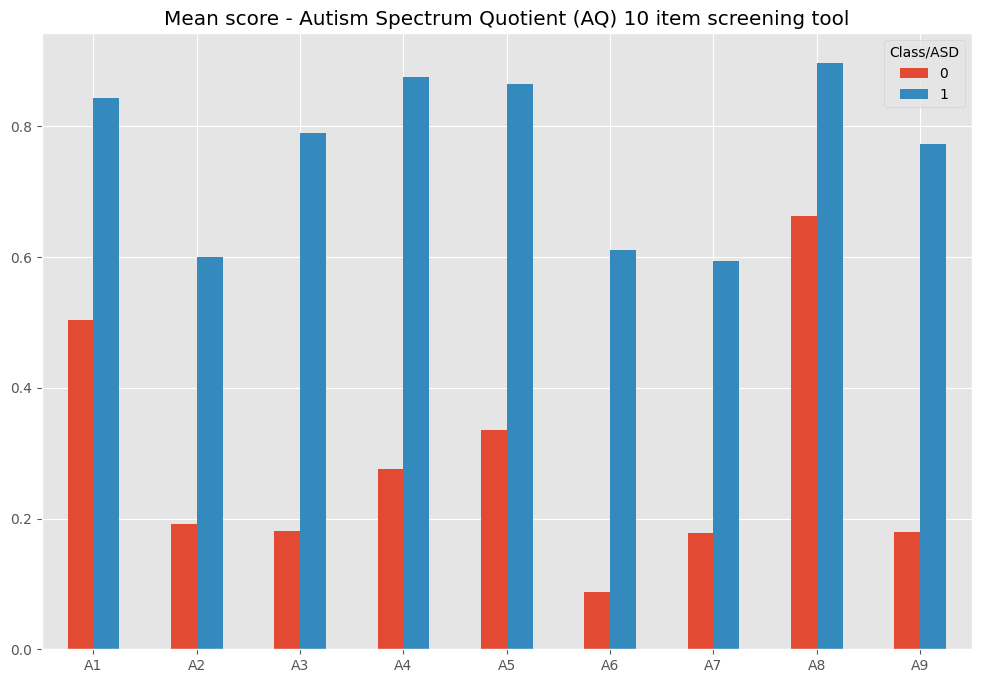

In [7]:
# Visualization of A_Score Feature

score_features = train.filter(regex='A[0-9]_', axis=1).columns.tolist()
train.groupby('Class/ASD')[score_features].mean().T.plot.bar()
plt.title('Mean score - Autism Spectrum Quotient (AQ) 10 item screening tool')
plt.xticks(ticks=range(len(score_features)), labels=[x.split('_')[0] for x in score_features], rotation=0);

 Patients with higher scores are more likely to have autism.

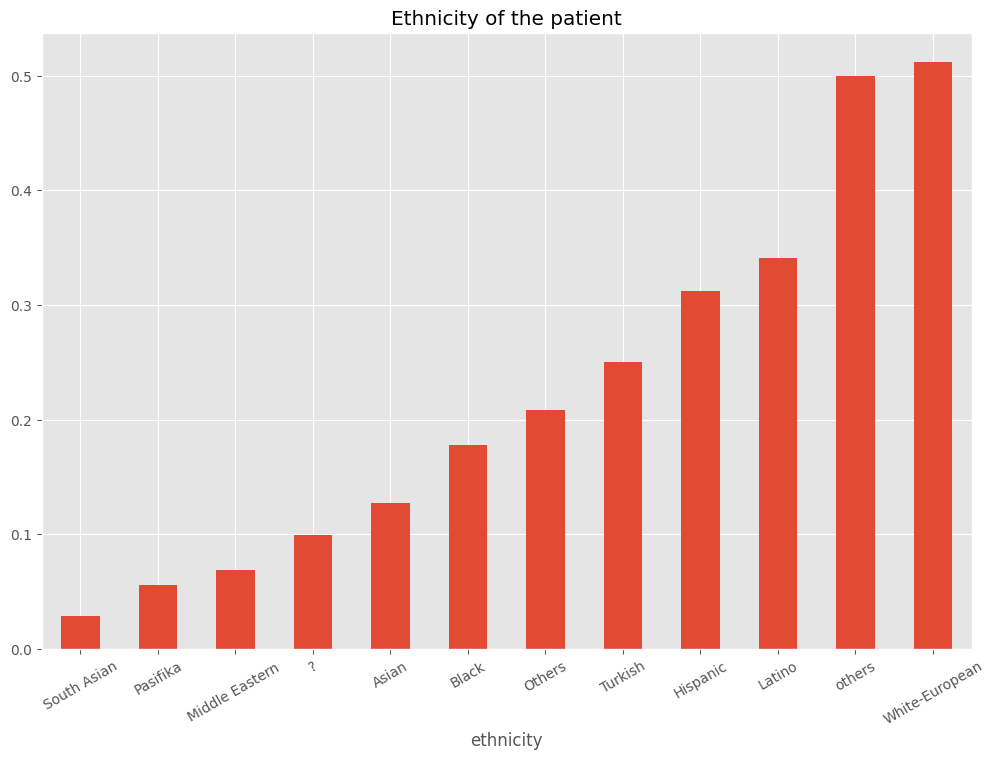

In [8]:
#Visualization of Ethnicity of the patient

train.groupby('ethnicity')['Class/ASD'].mean().sort_values().plot.bar()
plt.title('Ethnicity of the patient')
plt.xticks(rotation=30);

From the above plot, we can see that our train data contains 11 diffrent races including others and "?" (uknown), White-European is the most present ethnicity.

<Axes: xlabel='gender', ylabel='age'>

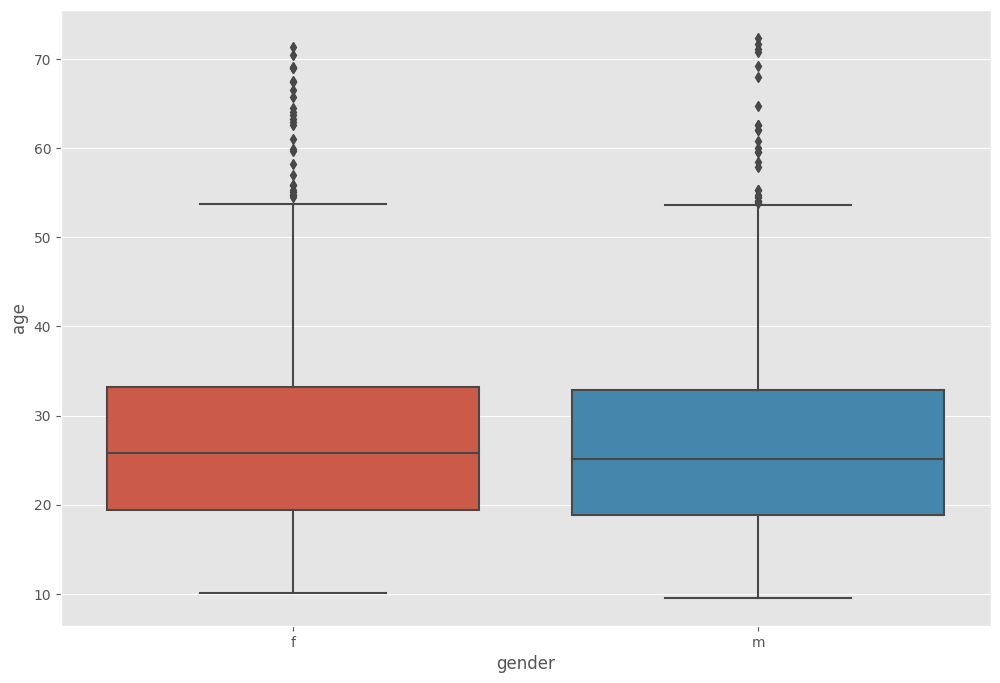

In [9]:
# Visualization of boxplot of age vs gender

sns.boxplot(y=train.age,x=train.gender,data=train)

In [10]:
train['country_of_res'].unique()

array(['United States', 'Australia', 'United Kingdom', 'New Zealand',
       'Italy', 'Nicaragua', 'Canada', 'United Arab Emirates',
       'Netherlands', 'Sri Lanka', 'India', 'Armenia', 'Sierra Leone',
       'Argentina', 'Azerbaijan', 'Iceland', 'Egypt', 'Serbia',
       'Afghanistan', 'Costa Rica', 'Jordan', 'Angola', 'Pakistan',
       'Brazil', 'Ireland', 'Kazakhstan', 'Viet Nam', 'Ethiopia',
       'Austria', 'Finland', 'France', 'Malaysia', 'Japan', 'Spain',
       'Philippines', 'Iran', 'Czech Republic', 'Russia', 'Romania',
       'Mexico', 'Belgium', 'Aruba', 'Uruguay', 'Indonesia', 'Ukraine',
       'AmericanSamoa', 'Germany', 'China', 'Iraq', 'Tonga',
       'South Africa', 'Saudi Arabia', 'Hong Kong', 'Bahamas', 'Ecuador',
       'Cyprus', 'Bangladesh', 'Oman', 'Bolivia', 'Sweden', 'Niger'],
      dtype=object)

In [11]:
#Visualization of country of residence of the patient
import plotly.express as px

fig = px.treemap(train, path=['country_of_res','Class/ASD'], color='Class/ASD',
                 color_continuous_scale='plotly3',
)

fig.update_layout(title="<b> COUNTRY OF RESIDENCE OF THE PATIENT - TREEMAP <b>",
                  titlefont={'size': 20, 'family': "San Serif"},
                  height=500, width=1000,
                  template='simple_white',
                  autosize=False,
                  margin=dict(l=50,r=50,b=50, t=250,
                             ),
                 )
fig.update_layout(margin = dict(t=50, l=50, r=50, b=100))
fig.show()

United states, New Zealand and United Kingdom are the most presented countries within our train data.

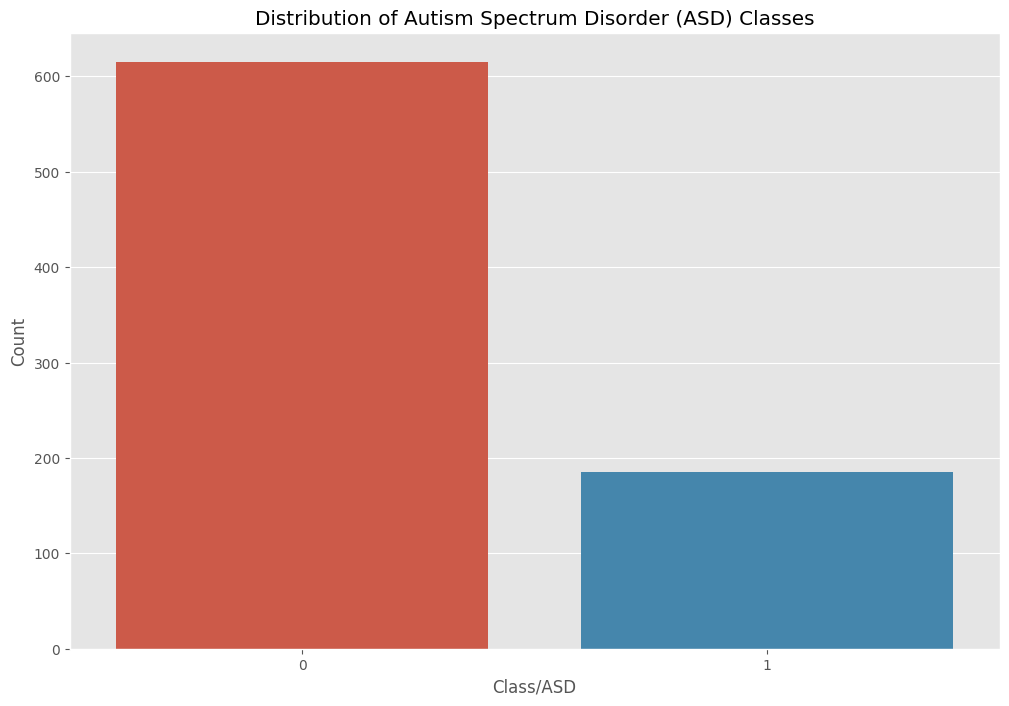

In [12]:
# Visualization of distribution of the target column
sns.countplot(x='Class/ASD', data=train)
plt.title('Distribution of Autism Spectrum Disorder (ASD) Classes')
plt.xlabel('Class/ASD')
plt.ylabel('Count')
plt.show()

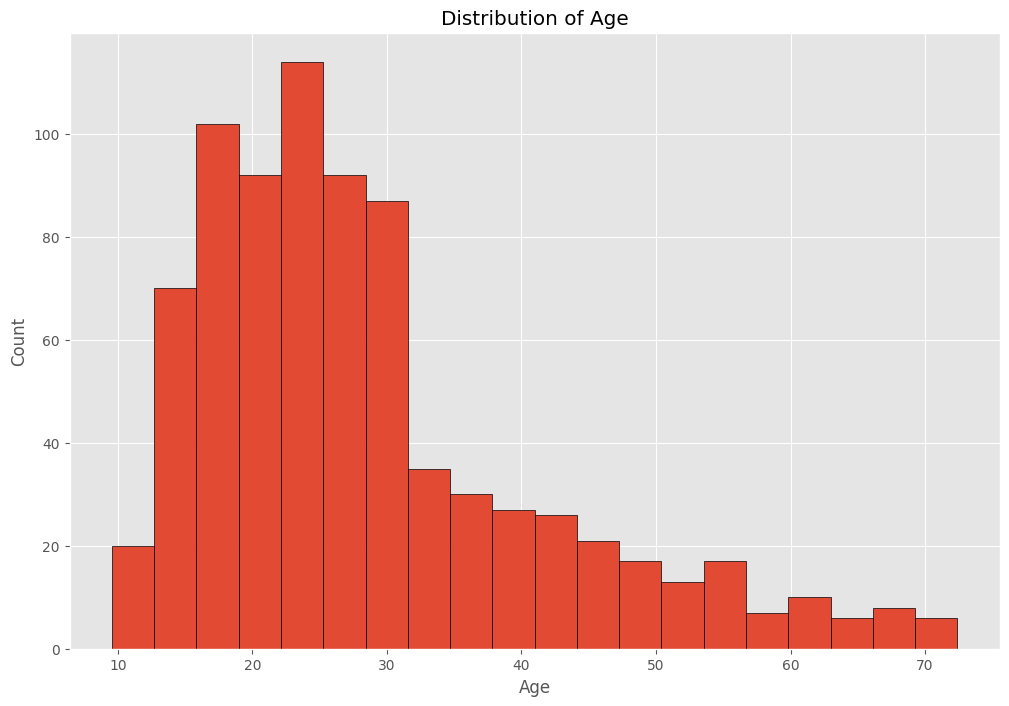

In [13]:
# Visualization of distribution of the age variable

plt.hist(train['age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, ' Autism by jaundice ')

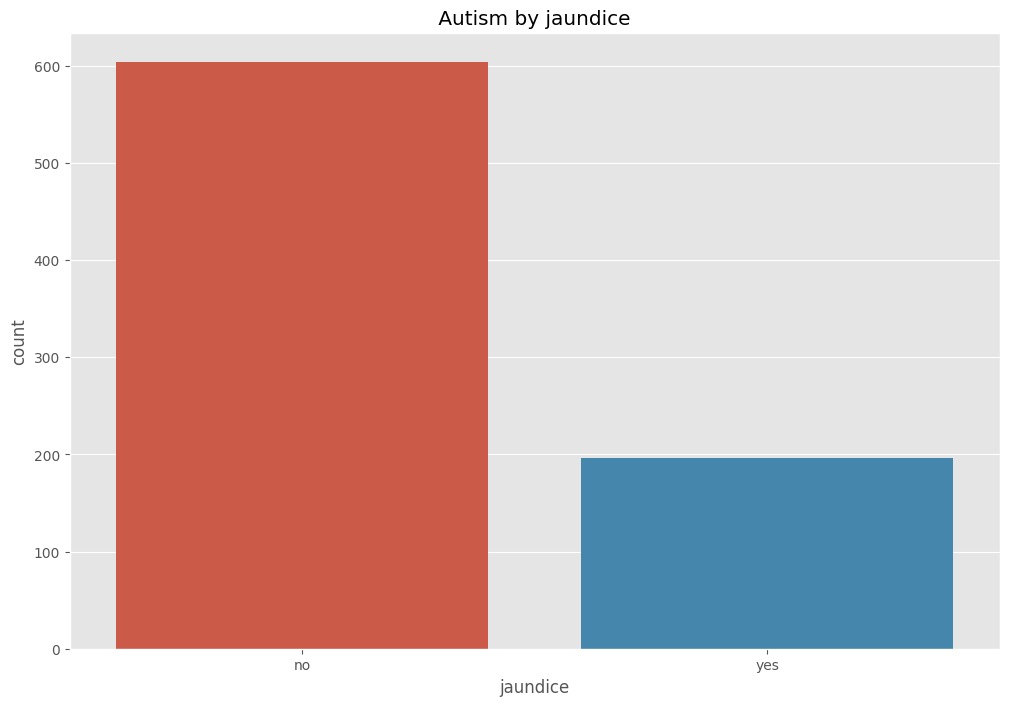

In [14]:
#Visualization of Autism by jaundice

sns.countplot(x="jaundice",data=train)
plt.title(' Autism by jaundice ')

Text(0.5, 1.0, 'Autism presence in the family ')

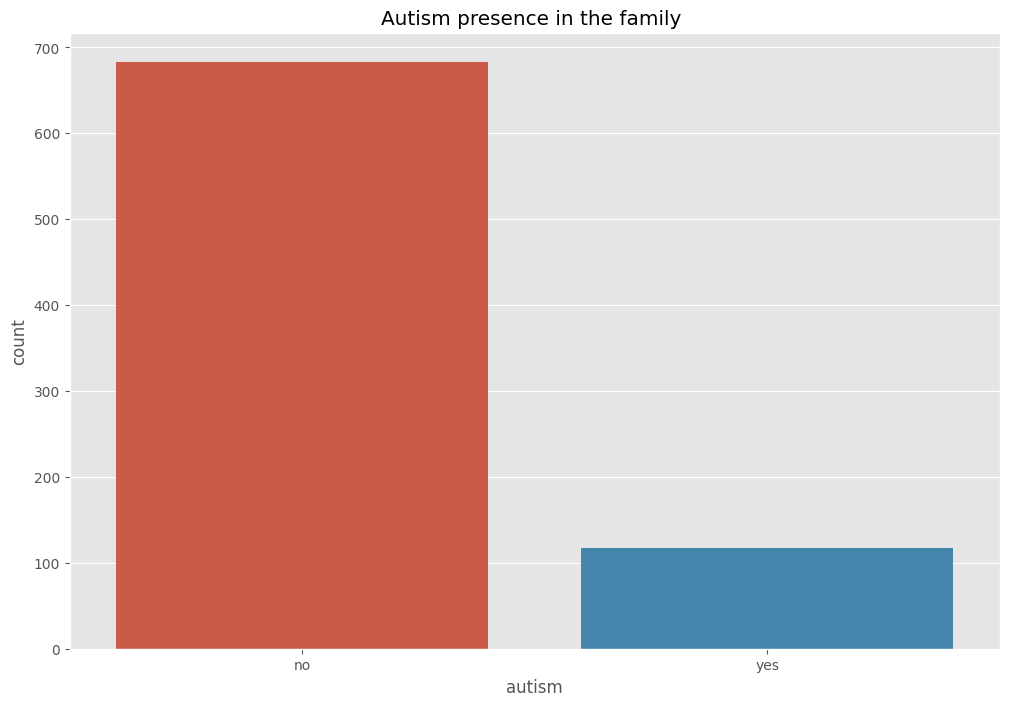

In [15]:
#Visualization of Autism presence in the family

sns.countplot(x="autism",data=train)
plt.title('Autism presence in the family ')

 From the above plot, we can observe that less patients have an immediate family members who have been diagnose for autism.

Text(0.5, 1.0, 'Autism by screening test')

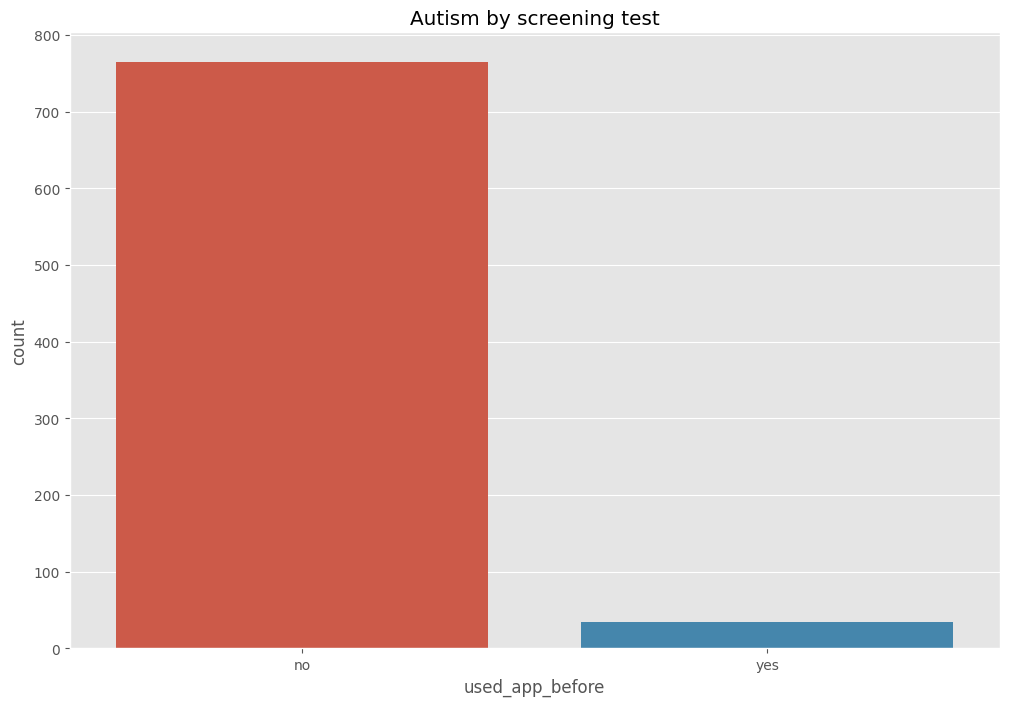

In [16]:
#Visualization of Autism by screening test

sns.countplot(x="used_app_before",data=train)
plt.title('Autism by screening test')

From the above plot, we can observe that from the total 800 only 30 patients has undergone a screening test before.

Here, we can observe that A3_Score, A6_Score, A9_Score and A4_Score have the highest correlation with result, which implies that they have the highest say in determining whether the person has Autism or not.

In [17]:
from sklearn.preprocessing import LabelEncoder

# Creating a label encoder instance
label_encoder = LabelEncoder()

# List of categorical columns to label encode
categorical_columns = ['gender', 'jaundice', 'autism', 'used_app_before', 'age_desc', 'relation']

# Applying label encoding to each categorical column in both train and test sets
for column in categorical_columns:
    train[column] = label_encoder.fit_transform(train[column])
    test[column] = label_encoder.transform(test[column])

# Displaying the updated train dataset
display(train.head())

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,0,White-European,0,0,United States,0,7.819715,0,5,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,0,South Asian,0,0,Australia,0,10.544296,0,0,0
2,3,1,1,1,1,1,1,0,0,1,1,14.679893,0,White-European,0,0,United Kingdom,0,13.167506,0,5,1
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,0,South Asian,0,0,New Zealand,0,1.530098,0,0,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,1,Black,0,1,Italy,0,7.949723,0,5,0


In [18]:
# Applying label encoding to 'ethnicity' and 'country_of_res'
train['ethnicity'] = label_encoder.fit_transform(train['ethnicity'])
test['ethnicity'] = label_encoder.transform(test['ethnicity'])

train['country_of_res'] = label_encoder.fit_transform(train['country_of_res'])
test['country_of_res'] = label_encoder.fit_transform(test['country_of_res'])

# Displaying the updated train dataset
display(train.head())

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,0,10,0,0,58,0,7.819715,0,5,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,0,8,0,0,6,0,10.544296,0,0,0
2,3,1,1,1,1,1,1,0,0,1,1,14.679893,0,10,0,0,57,0,13.167506,0,5,1
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,0,8,0,0,39,0,1.530098,0,0,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,1,2,0,1,32,0,7.949723,0,5,0


In [19]:
# Dropping irrelevant column
train.drop(columns=['ID'], inplace=True)
test.drop(columns=['ID'], inplace=True)

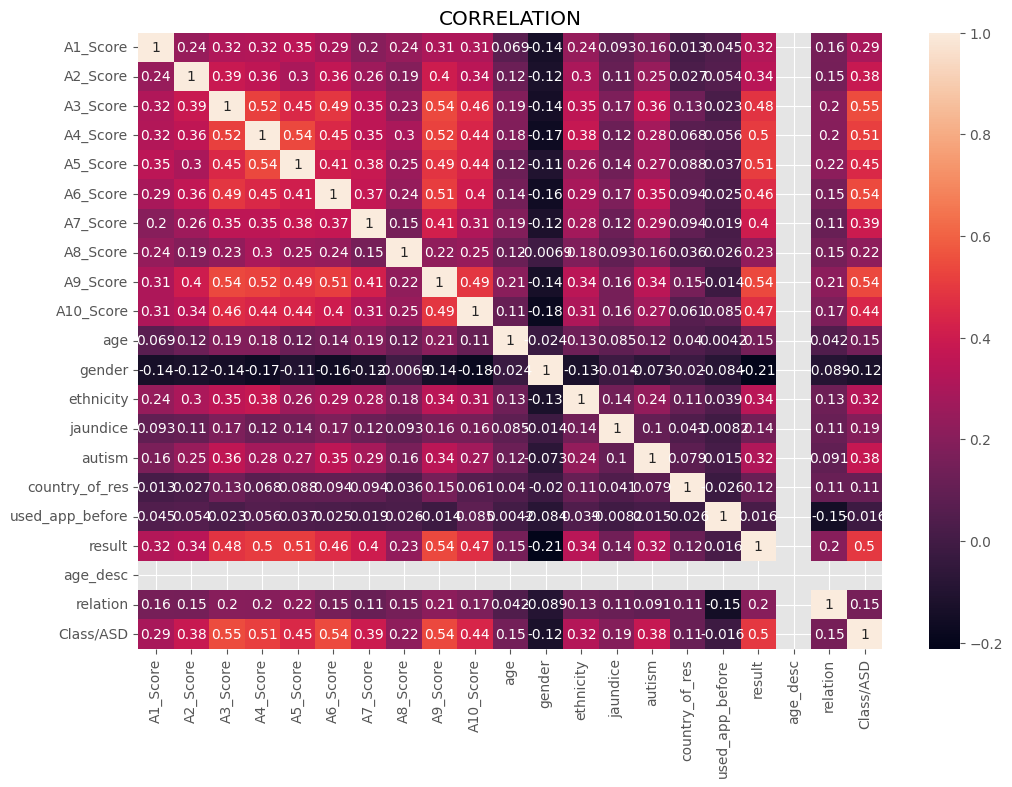

In [20]:
# Finding correlation between variables and output using heatmap

plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True)
plt.title("CORRELATION")
plt.show()

In [21]:
# Getting the correlated features in descending order
train.corr()['Class/ASD'].sort_values(ascending=False)[1:]

A3_Score           0.549618
A6_Score           0.542588
A9_Score           0.538688
A4_Score           0.512792
result             0.496165
A5_Score           0.448473
A10_Score          0.439587
A7_Score           0.394660
A2_Score           0.380703
autism             0.377079
ethnicity          0.324323
A1_Score           0.289991
A8_Score           0.219034
jaundice           0.190769
relation           0.152808
age                0.146376
country_of_res     0.110710
used_app_before   -0.015853
gender            -0.124789
age_desc                NaN
Name: Class/ASD, dtype: float64

In [22]:
# Dropping the 'age_desc' column since there is no correaltion with the target column
train.drop(columns=['age_desc'], inplace=True)
test.drop(columns=['age_desc'], inplace=True)

In [23]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['Class/ASD']),
                                                    train['Class/ASD'],
                                                    test_size=0.2,
                                                    random_state=42)

# Displaying the shapes of X_train, X_test, y_train, and y_test
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (640, 19)
y_train shape: (640,)
X_test shape: (160, 19)
y_test shape: (160,)


In [24]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now we can build our model for Autism Spectrum Disorder Prediction.

## Model Building

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Display the evaluation metrics for Random Forest
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

Accuracy: 0.8375
Confusion Matrix:
 [[106  15]
 [ 11  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       121
           1       0.65      0.72      0.68        39

    accuracy                           0.84       160
   macro avg       0.78      0.80      0.79       160
weighted avg       0.84      0.84      0.84       160



In [26]:
import joblib

# Saving the model
model_filename = 'model.joblib'
joblib.dump(rf_model, model_filename)

['model.joblib']